In [ ]:
# 투영, 다양체
    - 결정된 축으로 사이즈를 결정하면 차원이 줄어듬
    - 다양체 : 여러 방면에서 데이터를 봐도 같은 형태
        
# PCA 주성분분석 (PCA, KernelPCA(비선형), IncrementalPCA:하드디스크에서 일부씩 학습)
TruncatedSVD (정방행렬) : 변수선택을 포함

- 선형적인 특성을 추출( 선형 대수에 의한 계산 )
- 데이터 > 공분산행렬, 상관계수행렬을 구함 -> 고유값분해(eigen decopmposition) ->
고유치, 고유벡터(새로운 축) -> 새로운 축으로 데이터 변환(transform) -> 재표현 데이터
(다중 공선성이 없는 데이터 : 직교하는 데이터들) -> 노이즈 제거 -> 모델 적합성 상승 
- PCA 결과를 변수로 추가하면 정확도가 올라가는 효과가 있음

# MDS(다차원 척도법)

- 랜덤하게 결정된 행렬을 거듭제곱(자신의 전치행렬) -> 행렬 * 전치행렬 -> 정방행렬, 대칭행렬 출력 -> 고유값 분해
-> 고유치, 고유벡터 -> 고유치, 고유벡터(직교하는 축) -> 원하는 열벡터

-> 데이터에 적용하게 되면 차원축소됨 
1000(sample) x 100(변수) 100 x 2  -> 1000 x 2 ->시각화 -> 통찰얻기 위함

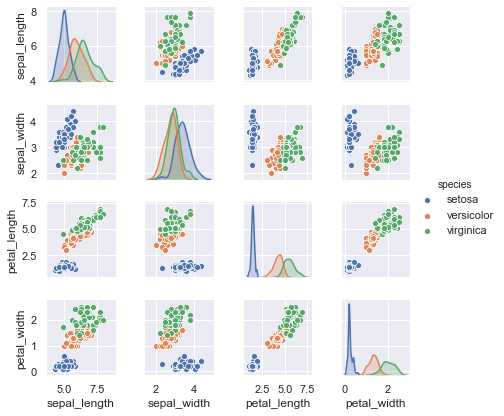

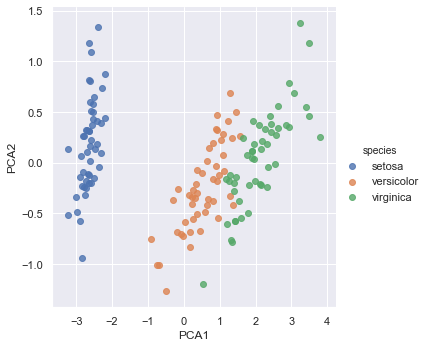

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
iris = sns.load_dataset("iris")
iris.head()
sns.pairplot(iris, hue='species', height=1.5) # 변수간 상관도
X_iris = iris.iloc[:,:4]
from sklearn.decomposition import PCA
# 차원축소가 되더라도 모든 데이터를 고려한 ㄴ차원축소
model = PCA(n_components=2) # 정방행렬 변수가 4개 -> 4x4 고유벡터 중 2열만 취하라 -> 차원축소
model.fit(X_iris) # 2개의 축이 생성
X_2D = model.transform(X_iris) # 데이터를 재표현
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
# 선형회귀 그래포 출력
sns.lmplot("PCA1","PCA2",hue='species',data=iris, fit_reg = False)
plt.show()

In [3]:
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)

 

import pandas as pd

df = pd.DataFrame(X, columns=['$X_1$', '$X_2$', '$X_3$'])
df.head(10) 

X.shape: (60, 3)


,$X_1$,$X_2$,$X_3$
0,-1.015700,-0.550913,-0.261326
1,-0.007717,0.599586,0.035078
2,-0.953171,-0.464537,-0.249203
3,-0.920123,0.210096,0.021824
4,-0.763097,0.158261,0.191525
5,1.118161,0.325087,0.317106
6,-1.022589,-0.643841,-0.133687
7,0.673520,-0.273425,-0.007878
8,1.016196,0.515466,0.467833
9,0.549577,0.677280,0.234016


In [5]:
# 공분산 계산 
# 2개의 변수가 있다면 (X-X의 평균)(Y-Y의 평균)/(n-1)
X_cen = X - X.mean(axis=0)
X_cen

array([[-1.03976771e+00, -7.60238460e-01, -3.32880482e-01],
       [-3.17841939e-02,  3.90260570e-01, -3.64766659e-02],
       [-9.77238797e-01, -6.73862060e-01, -3.20757101e-01],
       [-9.44190485e-01,  7.70779228e-04, -4.97304144e-02],
       [-7.87164831e-01, -5.10641487e-02,  1.19970744e-01],
       [ 1.09409378e+00,  1.15762056e-01,  2.45551498e-01],
       [-1.04665623e+00, -8.53165791e-01, -2.05241169e-01],
       [ 6.49452398e-01, -4.82750342e-01, -7.94325731e-02],
       [ 9.92128132e-01,  3.06140931e-01,  3.96278747e-01],
       [ 5.25509785e-01,  4.67955007e-01,  1.62461684e-01],
       [-1.01367188e+00, -2.00458976e-01, -1.93074561e-01],
       [ 1.10841362e+00,  7.29745189e-02, -1.82449496e-03],
       [-1.01744457e+00, -4.77653389e-01, -2.29165228e-01],
       [-9.71704237e-01, -7.08910047e-01, -2.10833327e-01],
       [ 1.07688965e+00, -3.86770525e-02,  2.63501050e-02],
       [-3.70113351e-01,  2.44018985e-01, -7.21578839e-03],
       [ 6.66958762e-01, -4.82702763e-01

In [6]:
# 3 x 60 , 60 x 3 > 3 x3 
# 내적의 의미
# 공분산 행렬 구함
X_cov = np.dot(X_cen.T, X_cen) / 59  #/n-1
print(X_cov)

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [7]:
w, v = np.linalg.eig(X_cov)
print('eigenvalue :' , w) # 고유값 , 정렬된 결과 , 분산이 가장 큰것을 기준(분산이 크면 주성분)
print('eigenvector :' , w) # 고유벡터

eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector : [0.77830975 0.1351726  0.01034272]


In [9]:
print("설명력 :", w/w.sum())  # 종속변수에 대한 설명력

설명력 : [0.84248607 0.14631839 0.01119554]


In [11]:
# 특ㅇ행렬 분해 > 비정방행렬에 대해서 실행 (특수한 경우가 정방행렬)
U,D,V_t = np.linalg.svd(X_cen)
print('singular value :' ,D)
print("singular vector :\n", V_t.T) # SVD 의 결과는 전치되어 있음

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [13]:
# 사이즈가 반 
print('explained variance ratio:', D**2 / np.sum(D**2))

explained variance ratio: [0.84248607 0.14631839 0.01119554]


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
print('singular value:', pca.singular_values_) # svd
print('singular value:', pca.components_.T) # svd


singular value: [6.77645005 2.82403671 0.78116597]
singular value: [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]


In [18]:
print('eigen_value :', pca.explained_variance_) # 값으로 나타난 설명력
print('explained variance ratio :' , pca.explained_variance_ratio_) # 비율 설명력

eigen_value : [0.77830975 0.1351726  0.01034272]
explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [19]:
# PCA 에서 적절한 차원수를 결정 

In [21]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 #95%를 설명하는 설명력의 인덱스 
print("선택할 차원수 : ", d) # 2 미미한 영향이고 noise로 판단

선택할 차원수 :  2


In [24]:
pca = PCA(n_components=0.95)
X_proj = pca.fit_transform(X)

print('principal component vec:\n', pca.components_.T)


principal component vec:
 [[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]


In [ ]:
- eigen 분해 / svd / scikits 의 pca 
- 95 % 설명력을 갖는 변수 선택 
- mnist 784차원 > 154차원 축소 (차원축소) > 축소된 데이터로 이미지 원래의 이미지복원

In [37]:
# 2.2.4 버전( 별도 설치할 경우)에서 tf 측에서 keras 와 병합
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 
(train_x, train_y),(test_x,test_y) = mnist.load_data()
print(train_x.shape)
train_x = train_x.reshape(-1, 28 * 28) # 784 dlfckdnjs qusghks
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_x) # 새로운축으로 변환된 데이터
print(pca.n_components_) # 154 변수의 개수


(60000, 28, 28)
154


In [38]:
X_recoverd = pca.inverse_transform(X_reduced) # 원래의 이미지 사이즈로 원복


In [43]:
import matplotlib.pyplot as plt
import matplotlib
def plot_digits(instances, images_per_row=5, **options):
    size = 28 # 전체 이미지 사이즈가 29에 해당하는 함수
    images_per_row = min(len(instances), images_per_row) # 행당 이미지 사이즈 결정
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1 # 행수 결정
    row_images = []
    n_empty = n_rows * images_per_row - len(instances) # 사각형중에 부족한 부분
    images.append(np.zeros((size, size * n_empty))) 
    for row in range(n_rows):
        # 범위값으로 이미지 위치를 지정
        rimages = images[row * images_per_row : (row + 1) * images_per_row] 
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off") 

C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50517 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52629 missing from current f

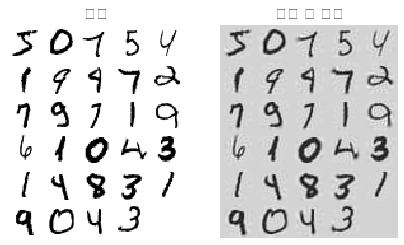

In [45]:

plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title("원본", fontsize= 16)
plt.subplot(122)
plot_digits(X_recoverd[::2100])
plt.title("압축 후 복원", fontsize= 16)
plot_digits(X_recoverd[::2100])

In [46]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=54) # 변수 개수로 지정
for batch_x in np.array_split(train_x,n_batches): # 데이터 서브배열로 분할
    print(",", end="")
    inc_pca.partial_fit(batch_x)
    
X_reduced = inc_pca.transform(train_x)


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [47]:
X_recoverd_inc_pca = inc_pca.inverse_transform(X_reduced) # 원래 이미지 사이즈로 복원

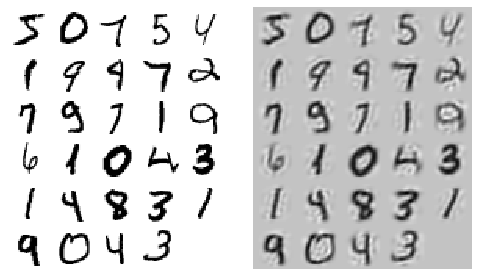

In [49]:
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.subplot(122)
plot_digits(X_recoverd_inc_pca[::2100])
plt.tight_layout()

In [50]:
60000 * 784 

47040000

In [51]:
(60000* 154) / (60000*784) # 80 % 의 메모리 절감

0.19642857142857142

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 

cancer = load_breast_cancer()
print(cancer.feature_names)
X_train, X_test,y_train,y_test = train_test_split(cancer.data, cancer.target,random_state=1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train,y_train)
print("테스트 세트 정확도 :{:.2f}".format(svm.score(X_test,y_test)))
svm.fit(X_train_scaled,y_train)
print("스케일이 조정된 테스트 세트의 정확도 {:.2f}".format(svm.score(X_test_scaled,y_test)))

print(X_train_scaled)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
테스트 세트 정확도 :0.62
스케일이 조정된 테스트 세트의 정확도 0.97
[[0.389938   0.70713561 0.4119273  ... 0.80962199 0.59957224 0.91755006]
 [0.37763264 0.31755157 0.36790823 ... 0.51168385 0.33174905 0.31598672]
 [0.36438071 0.35238417 0.35208348 ... 0.55292096 0.3476711  0.28857479]
 ...
 [0.48364807 0.50084545 0.48655933 ... 0.65257732 0.4151616  0.84259557]
 [0.3336173  0.3902604  0.31787713 ... 0.27364261 0.15684411 0.22443516]
 [0.28628899 0.29455529 0.268260

C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [80]:
# 문제 위의 스케일된 데이터에 대하여 
- 누적설명력을 이용한 그래프를 출력하고 적당한 component 수를 구하시오
- 컴포넌트 수를 6개 9개 20개인 경우의 정확도를 비교해보시오

SyntaxError: invalid syntax (<ipython-input-80-40f15ac605e3>, line 2)

[[ 0.30575375  2.59521918  0.46246107 ...  1.81549702  2.10164609
   3.38609913]
 [ 0.23351721 -0.05334893  0.20573083 ...  0.5143837   0.14721854
   0.05182385]
 [ 0.15572401  0.18345881  0.11343692 ...  0.69446859  0.263409
  -0.10011179]
 ...
 [ 0.85586279  1.19276558  0.89773369 ...  1.12967374  0.75591781
   2.97065009]
 [-0.02486734  0.44095848 -0.08606303 ... -0.52515632 -1.1291423
  -0.45561747]
 [-0.30270019 -0.20968802 -0.37543871 ... -0.967865   -1.54361274
  -1.31500348]]
(426, 30)
선택할 차원수 :  10
SVM테스트 정확도:0.95
SVM테스트 정확도:0.94
SVM테스트 정확도:0.92


C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\2-13\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


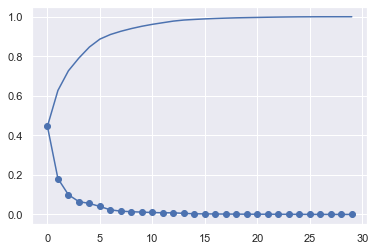

In [129]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
print(X_train_scaled)
print(X_train_scaled.shape)
pca = PCA(n_components=30)
pca = pca.fit(X_train_scaled)
plt.grid(True)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.grid(True)
plt.plot(pca.explained_variance_ratio_,'bo-')



cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 #95%를 설명하는 설명력의 인덱스 
print("선택할 차원수 : ", d) # 2 미미한 영향이고 noise로 판단


X_train, X_test, y_train, y_test = train_test_split(

cancer.data, cancer.target, random_state=1)
 

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

for x in [20,9,6]: # 97% 기존변수 30개에서 9로

    pca = PCA(n_components=x)

    pca.fit(X_train_scaled)

    X_t_train = pca.transform(X_train_scaled) # pca 이후의 데이터

    X_t_test = pca.transform(X_test_scaled)

    svm = SVC(C=100)

    svm.fit(X_t_train,y_train)

    print('SVM테스트 정확도:{:.2f}'.format(svm.score(X_t_test, y_test)))

In [127]:
print("PCA 주성분 형태:{}".format(pca.components_.shape)) # 축 변수


PCA 주성분 형태:(6, 30)


In [128]:
print("PCA 주성분:{}".format(pca.components_)) # transform

PCA 주성분:[[ 2.27727952e-01  1.15125429e-01  2.34880866e-01  2.29368295e-01
   1.34257906e-01  2.37160022e-01  2.57472643e-01  2.60831732e-01
   1.28883480e-01  4.44771262e-02  2.05926703e-01  1.45035459e-02
   2.10480600e-01  2.02438009e-01  1.01867571e-02  1.64939913e-01
   1.53175867e-01  1.78415012e-01  2.46122358e-02  9.25782919e-02
   2.32908159e-01  1.12324737e-01  2.40809688e-01  2.29457569e-01
   1.22454525e-01  2.08303026e-01  2.29910791e-01  2.49291962e-01
   1.15240250e-01  1.26763277e-01]
 [-2.15362267e-01 -6.01602111e-02 -1.97386080e-01 -2.12242935e-01
   1.93714685e-01  1.61665826e-01  6.56584195e-02 -2.40618685e-02
   1.88332406e-01  3.77871193e-01 -9.33235914e-02  1.04195564e-01
  -8.12542149e-02 -1.40402031e-01  2.19281447e-01  2.51896246e-01
   2.15694850e-01  1.53310362e-01  1.93854431e-01  3.02040600e-01
  -2.10358120e-01 -5.51038409e-02 -1.91044086e-01 -2.09342024e-01
   1.56961739e-01  1.32043594e-01  8.62556801e-02 -1.22824865e-02
   1.09276647e-01  2.71509521e-01

Text(0, 0.5, '주성분')

C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current fon

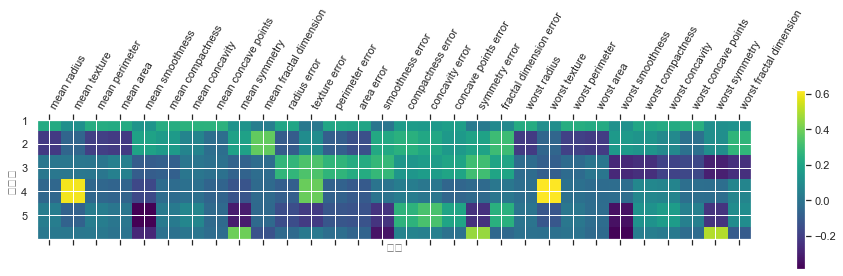

In [131]:
plt.matshow(pca.components_,cmap='viridis')

plt.yticks([0,1,2,3,4,5],['1','2','3','4','5'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation=60 , ha ='left')
plt.xlabel("특성")
plt.ylabel("주성분")

(87, 65)


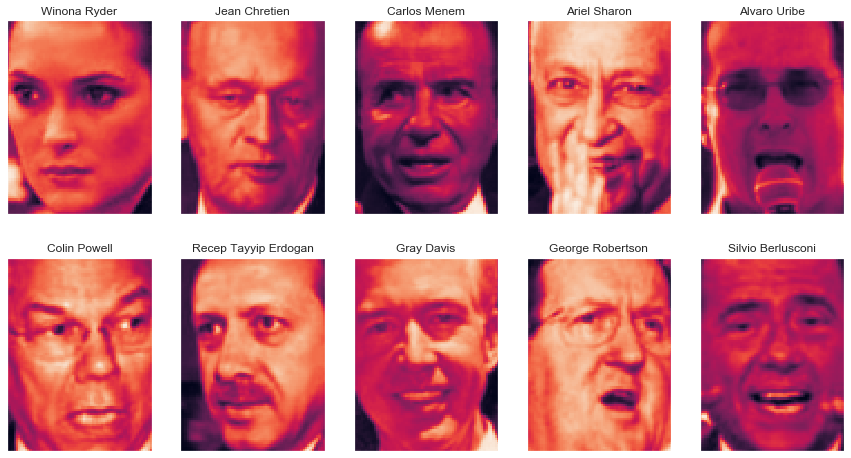

In [134]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt 
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape
print(image_shape)
fig,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for target, image , ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [135]:
people.images.shape

(3023, 87, 65)

In [136]:
len(people.target_names)

62

In [139]:
# 한사람당  몇장의 사진이 있는가
# 한 사람당 몇장의 사진이있는ㄱ.ㅏ

import numpy as np

counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):

    print('{0:25}{1:3}'.format(name,count), end=' ')

    if (i +1 ) % 3 == 0:

        print()

Alejandro Toledo          39 Alvaro Uribe              35 Amelie Mauresmo           21 
Andre Agassi              36 Angelina Jolie            20 Ariel Sharon              77 
Arnold Schwarzenegger     42 Atal Bihari Vajpayee      24 Bill Clinton              29 
Carlos Menem              21 Colin Powell             236 David Beckham             31 
Donald Rumsfeld          121 George Robertson          22 George W Bush            530 
Gerhard Schroeder        109 Gloria Macapagal Arroyo   44 Gray Davis                26 
Guillermo Coria           30 Hamid Karzai              22 Hans Blix                 39 
Hugo Chavez               71 Igor Ivanov               20 Jack Straw                28 
Jacques Chirac            52 Jean Chretien             55 Jennifer Aniston          21 
Jennifer Capriati         42 Jennifer Lopez            21 Jeremy Greenstock         24 
Jiang Zemin               20 John Ashcroft             53 John Negroponte           31 
Jose Maria Aznar          23 Jua

In [138]:
import pandas as pd 
pd.Series(people.target).value_counts()

14    530
10    236
58    144
12    121
15    109
     ... 
22     20
43     20
30     20
46     20
4      20
Length: 62, dtype: int64

In [140]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target== target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people /255

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_people,y_people, stratify=y_people, random_state = 0)

print(people.images[0].shape[0])

knn = KNeighborsClassifier(n_neighbors = 1 )
knn.fit(X_train,y_train)
print("1~ 최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test,y_test)))

87
1~ 최근접 이웃의 테스트 세트 점수: 0.23


In [143]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100 , whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("훈련차원 : {}".format(X_train_pca.shape))

훈련차원 : (1547, 100)


In [145]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("테스트 세트 정확도:{:.2f}".format(knn.score(X_test_pca,y_test)))

테스트 세트 정확도:0.31


In [152]:
pca.components_.shape

(100, 5655)

In [151]:
# 축 : 100 # 5655 (87,65) #  5655 의 변수를 100개로 축소 > reshape 특성자체가 이미지

C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48516 missing from current fon

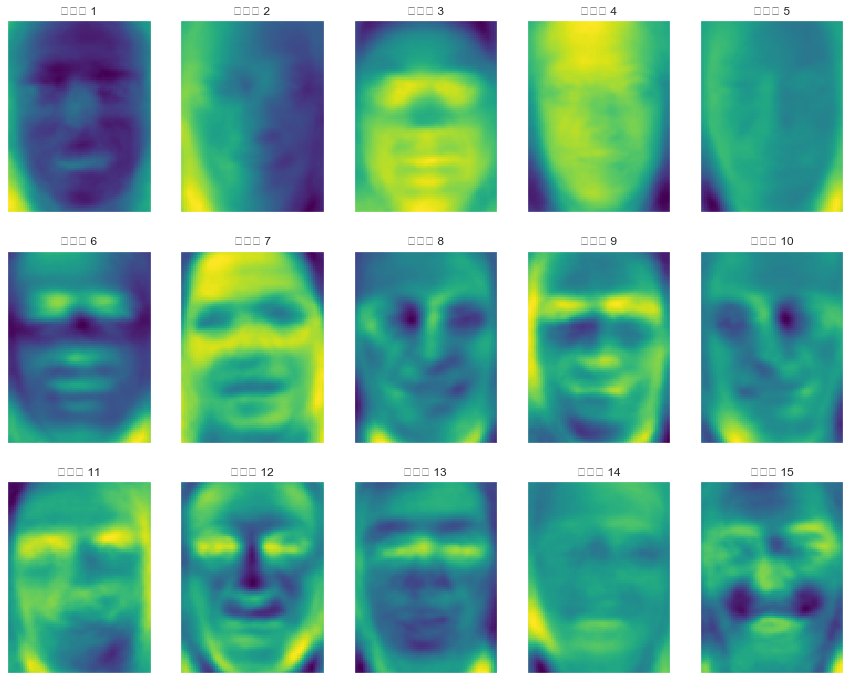

In [155]:
fig,axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={'xticks':(),'yticks':()})

for i, (component,ax ) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))

In [156]:
# 원래이미지 복원

C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50896 missing from current

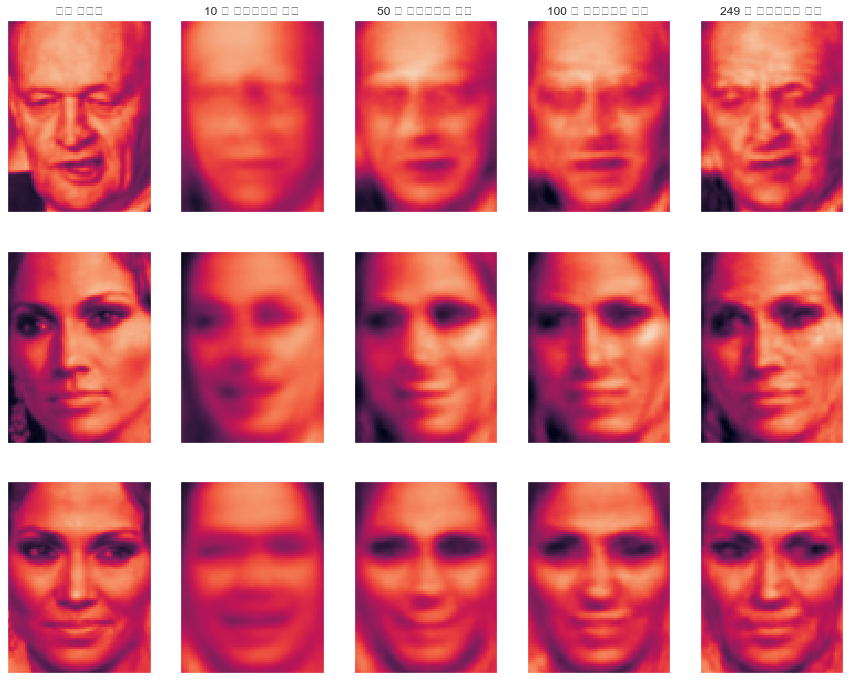

In [158]:
reduced_images = []
for n_components in [10,50,100,249]:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_test_pca = pca.transform(X_test)
    X_test_back = pca.inverse_transform(X_test_pca)
    reduced_images.append(X_test_back)

fix, axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={'xticks':(),"yticks":()})

for i, ax in enumerate(axes):
    ax[0].imshow(X_test[i].reshape(image_shape), vmin=0, vmax=1)
    for a, X_test_back in zip(ax[1:],reduced_images):
        a.imshow(X_test_back[i].reshape(image_shape), vmin=0, vmax=1)
        
axes[0,0].set_title("원래 이미지")
for ax, n_components in zip(axes[0,1:],[10,50,100,249]):
    ax.set_title("%d 개 주성분으로 복원" %n_components)

In [ ]:
# NMF(non-negative matrix factorization 비 음수 행렬에서 특징을 찾는다)
: PCA 와 비슷(음수 양수를 상계 - 특징이 소실)
: 이미지 , 음성 , 텍스트 는 모두 양수 값 


C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\2-13\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)


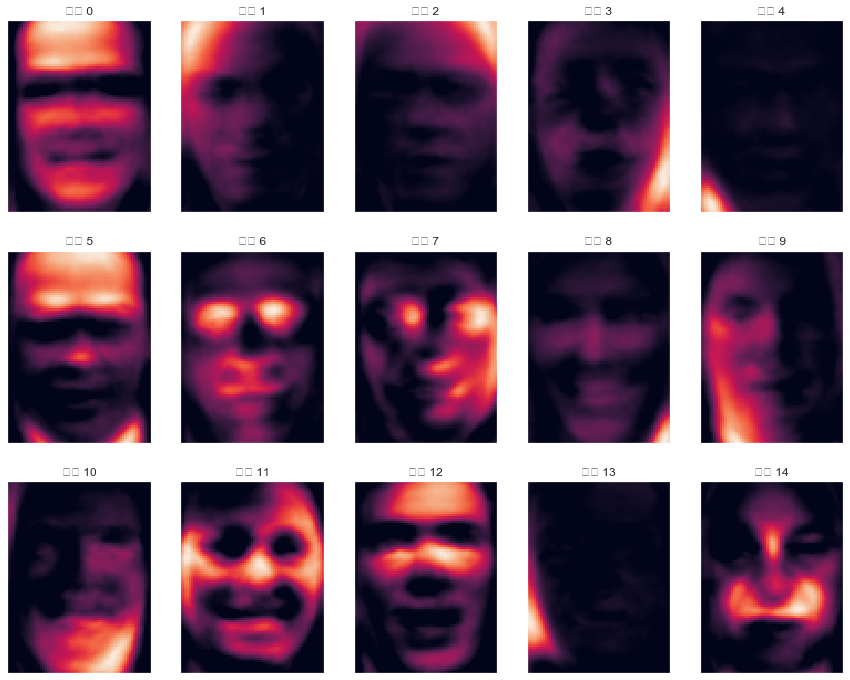

In [160]:
# 특징추출
from sklearn.decomposition import NMF
nmf = NMF(n_components= 15, random_state = 0) # 행열연산
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={'xticks':(),'yticks':()})

for i, (component,ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))
                        

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])] 

이미지차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1532, 2)
원래이미지의 차수  (288, 72)


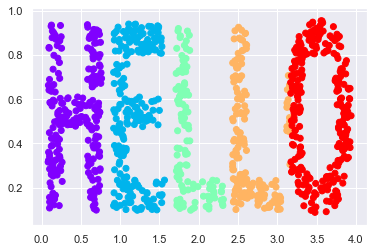

In [162]:
X= make_hello(1000)
colorize = dict(c=X[:,0], cmap=plt.cm.get_cmap('rainbow',5))
plt.scatter(X[:,0], X[:,1], ** colorize)

(1000, 2)
<class 'list'>


(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

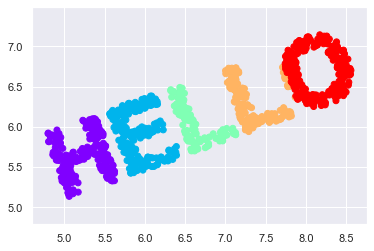

In [164]:
print(X.shape)
def rotate(X,angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],[-np.sin(theta),np.cos(theta)]]
    print(type(R))
    return np.dot(X,R)
X2 =rotate(X,20) + 5 
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal')

In [169]:
# eigen decomposition(고유값 분해)
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X) # 유클리디안 거리 = 피타고라스 정리
# 1000 개의 행 - > 거리값행렬 (정방행렬, 대칭행렬)
D.shape

(1000, 1000)

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


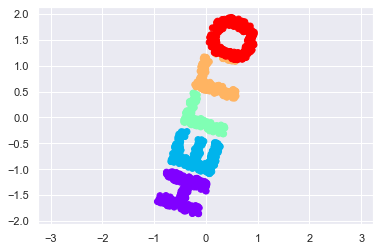

In [168]:
from sklearn.manifold import MDS 
# 시각화가 목적 component > 2,3 차원으로 
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1) # dissimilarity 비유사도 = 거리값
out = model.fit_transform(D)
plt.scatter(out[:,0], out[:,1], **colorize)
plt.axis('equal')
print(out)
    

In [170]:
# 1000x2 2x3 1000x3 
import numpy as np
rng = np.random.RandomState(10)# 공간변환 > 축은 직교
C = rng.randn(3,3)
print(np.dot(C,C.T)) # 행렬 자신에 거듭제곱 정방행렬 , 대칭행렬 

# 고유값 분해
e, V = np.linalg.eigh(np.dot(C,C.T)) 
print("eigenvecor",V)
print("eigenvecor",e)
print(np.dot(V[0],V[1])) # 행간 내적
print(np.dot(V[:,0],V[:,1])) # 열간 내적

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvecor [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvecor [0.02629875 0.37332691 5.26033253]
0.0
2.7755575615628914e-17


In [172]:
def random_projection(X,dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension,dimension)
    print("C는", C.shape)
    print(np.dot(C,C.T))
    e,V =np.linalg.eigh(np.dot(C,C.T)) # 3x3 의 정직교 축 
    print('V는', V.shape)
    print("차원은", V[:X.shape[1]])
    
    return np.dot(X, V[:X.shape[1]]) # 앞단 행렬의 열수와 뒷단 행열의 행수가 일치

print(X.shape) # (1000,2) 
print(X.shape[1])
print("데이터의 차원은", X.shape)
X3 = random_projection(X,3)
X3.shape

(1000, 2)
2
데이터의 차원은 (1000, 2)
C는 (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는 (3, 3)
차원은 [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

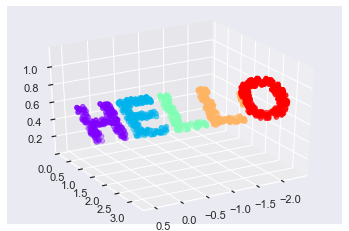

In [174]:
from mpl_toolkits import mplot3d
ax= plt.axes(projection='3d')
ax.scatter3D(X3[:,0],X3[:,1],X3[:,2],
            **colorize)
ax.view_init(azim=60, elev=30)

(-1.0390064107727621,
 1.0377133989963208,
 -2.0646660054511305,
 2.135458244484912)

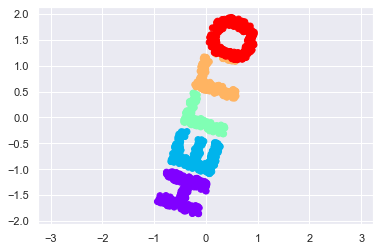

In [176]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:,0],out3[:,1], **colorize)
plt.axis('equal')

In [ ]:
MDS 는 선형데이터에 강함. -선형성을 띄는 데이터에 적용 가능

In [179]:
def make_hello_s_curve(X):
    t = (X[:,0]-2) *0.75 *np.pi
    x= np.sin(t)
    y= X[:,1]
    z = np.sign(t) * (np.cos(t)-1) # 중심값 이동
    return np.vstack((x,y,z)).T # 행으로 생성 3 행 열은 1000개 1000x3
XS = make_hello_s_curve(X)

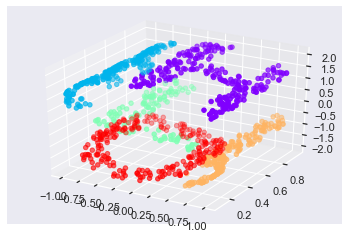

In [181]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:,0],XS[:,1],XS[:,2], **colorize);

(-1.3904556323554291,
 1.2493637628504926,
 -2.3855494181659127,
 2.1899859123555574)

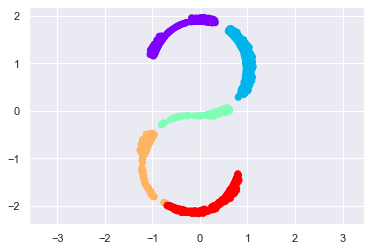

In [185]:
# 원본 모양을 유지하지 못함
from sklearn.manifold import MDS
model = MDS(n_components=2 , random_state =2)
outS = model.fit_transform(XS)
plt.scatter(outS[:,0],outS[:,1],**colorize)
plt.axis('equal')

(0.15, -0.15)

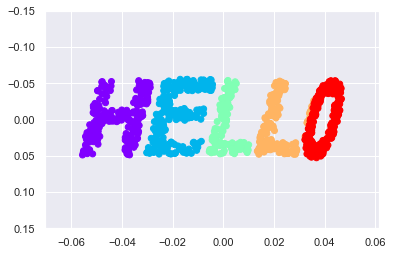

In [187]:
# 근접해 있는 데이터만 고려 , 원거리 데이터는 무시
from sklearn.manifold import LocallyLinearEmbedding # LLE
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',eigen_solver='dense')

out = model.fit_transform(XS)

fig, ax =plt.subplots()
ax.scatter(out[:,0], out[:,1], **colorize)
ax.set_ylim(0.15,-0.15)
                          